# CASE STUDY 7 - Supervised Learning

> Done by Jose Johnylal

----

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##  Reading the dataset

In [2]:
iris = pd.read_excel('iris.xls')

In [3]:
iris.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.shape

(150, 5)

##  Pre-processing the dataset

### 1. Handling missing values if any

In [5]:
iris.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

**It is observed that there are missing values in three columns: SL, SW, PL**

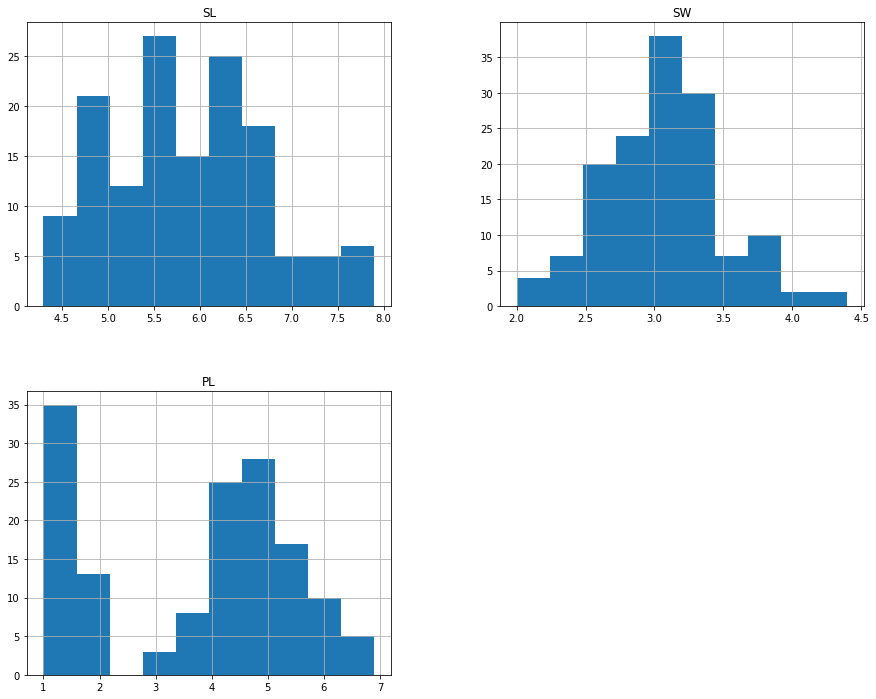

In [6]:
freqgraph = iris[['SL', 'SW', 'PL']]
freqgraph.hist(figsize=(15,12))
plt.show()

**Since all three columns are right skewed, we can fill the missing values with their respective column's median.**

In [7]:
iris['SL'] = iris['SL'].fillna(iris['SL'].median())
iris['SW'] = iris['SW'].fillna(iris['SW'].median())
iris['PL'] = iris['PL'].fillna(iris['PL'].median())

In [8]:
iris.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

**Missing values have been handled successfully.**

### 2. Handling outliers if any

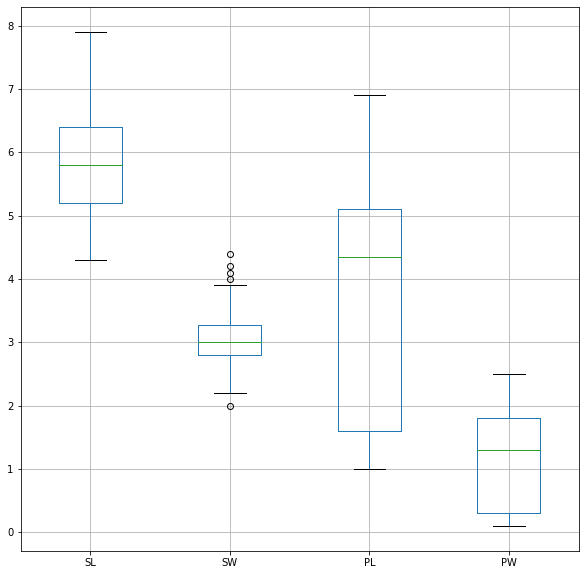

In [9]:
plt.figure(figsize=(10,10))
iris.boxplot()
plt.show()

**It is observed that SW has outliers.**

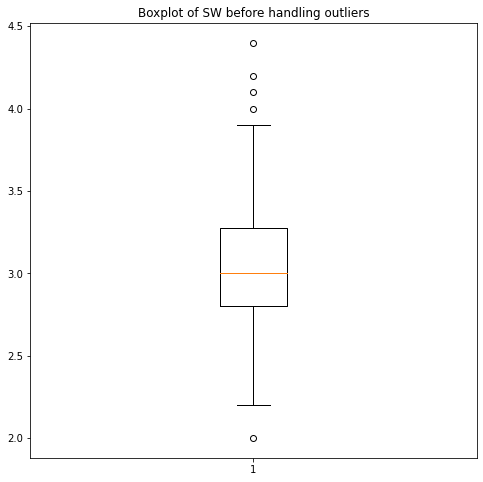

In [10]:
plt.figure(figsize=(8,8))
plt.boxplot(iris['SW'])
plt.title('Boxplot of SW before handling outliers')
plt.show()

In [11]:
Q1 = np.percentile(iris['SW'], 25, interpolation='midpoint')
Q2 = np.percentile(iris['SW'], 50, interpolation='midpoint')
Q3 = np.percentile(iris['SW'], 75, interpolation='midpoint')
IQR = Q3 - Q1
low_lim = Q1 - 1.5*IQR
up_lim = Q3 + 1.5*IQR

In [12]:
ind = iris['SW'] > up_lim 
ind1 = iris['SW'] < low_lim
iris.loc[ind].index, iris.loc[ind1].index

(Int64Index([14, 15, 32, 33], dtype='int64'), Int64Index([60], dtype='int64'))

In [13]:
iris.drop([14, 15, 32, 33, 60], inplace = True)

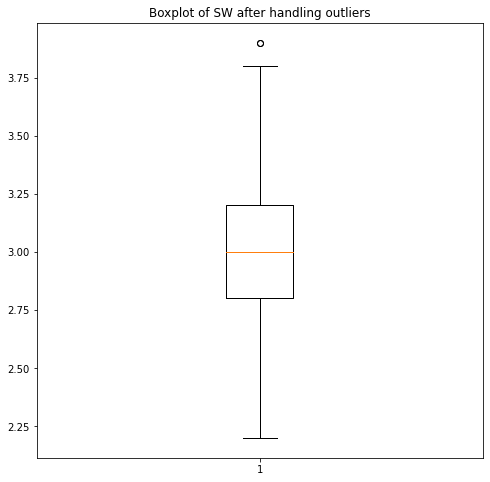

In [14]:
plt.figure(figsize=(8,8))
plt.boxplot(iris['SW'])
plt.title('Boxplot of SW after handling outliers')
plt.show()

**Outliers in SW have been handled successfully.**

### 3. Encoding if needed

In [15]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              145 non-null    float64
 1   SW              145 non-null    float64
 2   PL              145 non-null    float64
 3   PW              145 non-null    float64
 4   Classification  145 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.8+ KB


**Since all the columns that are going to be in the feature set are numerical (SL, SW, PL, PW), encoding is not required.**

### 4. Scaling if needed

**Prior to scaling, separation of the feature set and the target variable is done.**

In [16]:
X = iris.drop('Classification', axis=1)
y = iris['Classification']

**Creating train-test split (80/20)**

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

**Checking if 'X_test' and 'X_train' require scaling**

In [18]:
X_test.describe()

,SL,SW,PL,PW
count,29.000000,29.000000,29.000000,29.000000
mean,5.910345,3.044828,3.896552,1.231034
std,0.906069,0.405838,1.833903,0.761157
min,4.700000,2.400000,1.200000,0.100000
25%,5.200000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.300000,3.300000,5.100000,1.800000
max,7.900000,3.800000,6.700000,2.300000


In [19]:
X_train.describe()

,SL,SW,PL,PW
count,116.000000,116.000000,116.000000,116.000000
mean,5.856897,3.018103,3.835345,1.225862
std,0.796866,0.367743,1.688658,0.760791
min,4.300000,2.200000,1.000000,0.100000
25%,5.175000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.375000,1.350000
75%,6.400000,3.200000,5.100000,1.800000
max,7.700000,3.900000,6.900000,2.500000


**It is observed that standard scaling needs to be done on both sets.**

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### The dataset has been pre-processed and is ready for creating classification models.

##  Determining which classification model is best

In [21]:
iris['Classification'].value_counts()

Iris-virginica     50
Iris-versicolor    49
Iris-setosa        46
Name: Classification, dtype: int64

**Since the target variable has multi-class classification, the following supervised classification techniques are used:**

* k-Nearest Neighbors
* Support Vector Machines (Linear, Polynomial, Radial)
* Decision Tree
* Random Forest

### 1. k-Nearest Neighbors

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
acc_values = []
neighbors = np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    acc_values.append(acc)

Text(0, 0.5, 'accuracy')

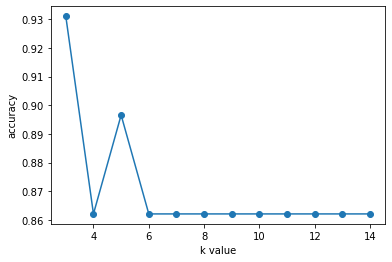

In [23]:
plt.plot(neighbors, acc_values, 'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

It is observed that k=3 has the highst accuracy.

**Final k-NN model with k=3**

In [24]:
classifier = KNeighborsClassifier(n_neighbors=3, metric='minkowski')
classifier.fit(X_train, y_train)
y_pred_knn = classifier.predict(X_test)

In [25]:
print('Accuracy score: ', accuracy_score(y_test, y_pred_knn))

Accuracy score:  0.9310344827586207


### 2. Support Vector Machines

#### 2.1 Linear SVM

In [26]:
from sklearn.svm import SVC 
svm_linear = SVC(kernel = 'linear')
svm_linear.fit(X_train, y_train)
y_pred_slinear = svm_linear.predict(X_test)

In [27]:
print('Accuracy score: ', accuracy_score(y_test, y_pred_slinear))

Accuracy score:  0.9310344827586207


#### 2.2 Polynomial SVM

In [28]:
acc_values = []
deg = np.arange(2,15)
for k in deg:
    svm_poly = SVC(kernel = 'poly', degree=k)
    svm_poly.fit(X_train, y_train)
    y_pred_poly = svm_poly.predict(X_test)
    acc = accuracy_score(y_test, y_pred_poly)
    acc_values.append(acc)

Text(0, 0.5, 'accuracy')

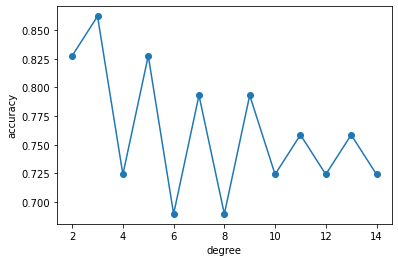

In [29]:
plt.plot(deg, acc_values, 'o-')
plt.xlabel('degree')
plt.ylabel('accuracy')

It is observed that degree=3 for the polynomial SVM yields the highest accuracy

**Final Polynomial SVM model with degree=3**

In [30]:
svm_poly = SVC(kernel = 'poly', degree=3)
svm_poly.fit(X_train, y_train)
y_pred_poly = svm_poly.predict(X_test)
print('Accuracy score: ', accuracy_score(y_test, y_pred_poly))

Accuracy score:  0.8620689655172413


#### 2.3 Radial SVM

In [31]:
svm_radial = SVC(kernel = 'rbf')
svm_radial.fit(X_train, y_train)
y_pred_radial = svm_radial.predict(X_test)
print('Accuracy score: ', accuracy_score(y_test, y_pred_radial))

Accuracy score:  0.9310344827586207


### 3. Decision tree

In [32]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()

In [33]:
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print('Accuracy score: ', accuracy_score(y_test, y_pred_dt))

Accuracy score:  0.896551724137931


### 4. Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [35]:
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print('Accuracy score: ', accuracy_score(y_test, y_pred_rf))

Accuracy score:  0.8620689655172413


#### FINAL OBSERVATIONS:

In [36]:
print('Accuracy score of k-NN classifier with k=3 :      ', accuracy_score(y_test, y_pred_knn))
print('Accuracy score of linear SVM:                     ', accuracy_score(y_test, y_pred_slinear))
print('Accuracy score of polynomial SVM with degree=3 :  ', accuracy_score(y_test, y_pred_poly))
print('Accuracy score of radial SVM:                     ', accuracy_score(y_test, y_pred_radial))
print('Accuracy score of Decision tree:                  ', accuracy_score(y_test, y_pred_dt))
print('Accuracy score of Random Forest Algorithm:        ', accuracy_score(y_test, y_pred_rf))

Accuracy score of k-NN classifier with k=3 :       0.9310344827586207
Accuracy score of linear SVM:                      0.9310344827586207
Accuracy score of polynomial SVM with degree=3 :   0.8620689655172413
Accuracy score of radial SVM:                      0.9310344827586207
Accuracy score of Decision tree:                   0.896551724137931
Accuracy score of Random Forest Algorithm:         0.8620689655172413


## Conclusions:

> * k-NN classifier, linear & radial SVMs provide the best result to predict the iris species. 
> * Three supervised learning techniques have been identified as best with an accuracy score of 93.1 % for each.